In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart=pd.read_csv("heart.csv")

In [3]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,135.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,NaN,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115.0,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174.0,N,0.0,Flat,1


**People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyper lipidaemia or already established disease) need early detection and management.Thus here it is a dataset which gives the prediction of heart failure based on certain factors.**

**Age**: age of the patient [years]

**Sex**: sex of the patient [M: Male, F: Female]

**ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

**RestingBP**: resting blood pressure [mm Hg]

**Cholesterol**: serum cholesterol [mm/dl]

**FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

**RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

**MaxHR**: maximum heart rate achieved

**ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]

**Oldpeak**: oldpeak = ST [Numeric value measured in depression]

**ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

**HeartDisease**: output class [1: heart disease, 0: Normal]

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             823 non-null    object 
 2   ChestPainType   825 non-null    object 
 3   RestingBP       805 non-null    float64
 4   Cholesterol     765 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           788 non-null    float64
 8   ExerciseAngina  907 non-null    object 
 9   Oldpeak         890 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 86.2+ KB


In [5]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,805.000000,765.000000,918.000000,788.000000,890.000000,918.000000
mean,53.510893,132.371429,199.074510,0.238562,137.786802,0.888090,0.553377
std,9.432617,18.511457,110.471768,0.426437,25.299331,1.073724,0.497414
min,28.000000,0.000000,0.000000,0.000000,63.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,140.000000,0.500000,1.000000
75%,60.000000,140.000000,268.000000,0.000000,157.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
heart.duplicated().sum()

0

In [7]:
heart_copy=heart.copy()

In [8]:
(heart_copy.isnull().sum()/918)*100

Age                0.000000
Sex               10.348584
ChestPainType     10.130719
RestingBP         12.309368
Cholesterol       16.666667
FastingBS          0.000000
RestingECG         0.000000
MaxHR             14.161220
ExerciseAngina     1.198257
Oldpeak            3.050109
ST_Slope           0.000000
HeartDisease       0.000000
dtype: float64

# **DATA CLEANING & EXPLORATORY DATA ANALYSIS**

# Filling the missing values of each variable with best suitable method

**A) Sex**

<Axes: xlabel='Sex', ylabel='count'>

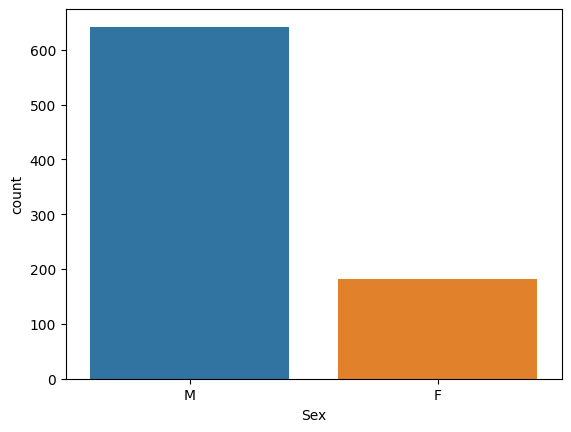

In [9]:
sns.countplot(x="Sex",data=heart_copy)

In [10]:
#since males are much more than females thus we fill the missing sex values with male
heart_copy["Sex"].fillna("M",inplace=True)

**B) Age**

<Axes: >

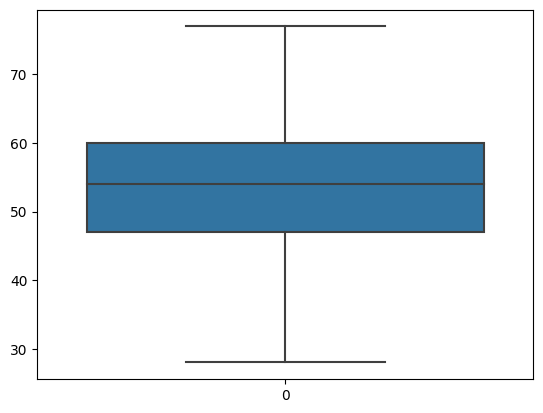

In [11]:
sns.boxplot(heart_copy["Age"])

In [12]:
heart_copy["Age"].mean()

53.510893246187365

In [13]:
heart_copy["Age"].median()

54.0

In [14]:
#From the box-plot and mean-median values it can be concluded that the "Age" variable have no outliers in it thus we null values can be replaced by either mean or median
heart_copy["Age"].fillna(heart_copy["Age"].mean(),inplace=True)

**C) Chest-Pain Type**

In [15]:
heart_copy["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA', nan], dtype=object)

<Axes: xlabel='ChestPainType', ylabel='count'>

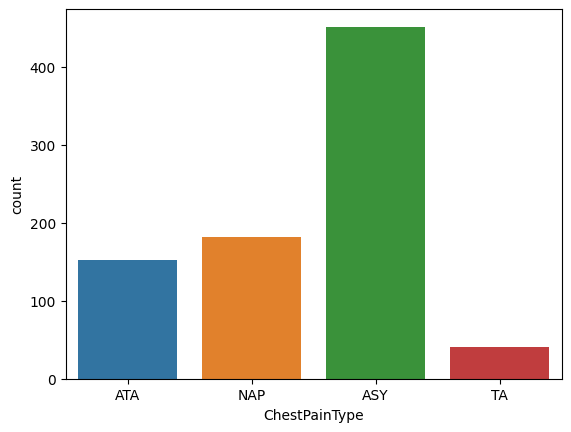

In [16]:
sns.countplot(x="ChestPainType",data=heart_copy)

In [17]:
#From the countplot it can be conclude that ASY appears most frequently in the patients 
heart_copy["ChestPainType"].fillna("ASY",inplace=True)

**D) Resting BP**

<Axes: >

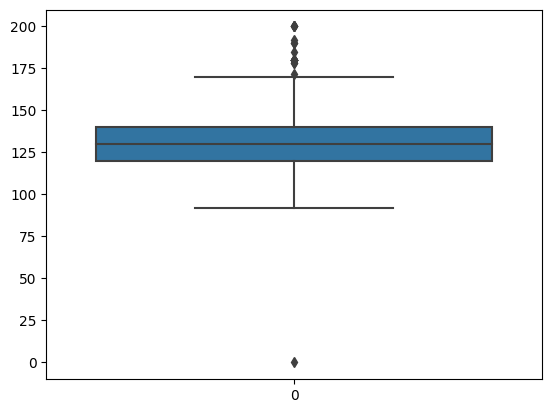

In [18]:
sns.boxplot(heart_copy["RestingBP"])

In [19]:
#From the box plot we get that this variable contain outliers thus we can't fill null values with maen thus we can fill them by much better method called Imputation
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(heart_copy[["RestingBP"]])
heart_copy["RestingBP"]=imputer.transform(heart_copy[["RestingBP"]])

**E) Cholesterol**

<Axes: >

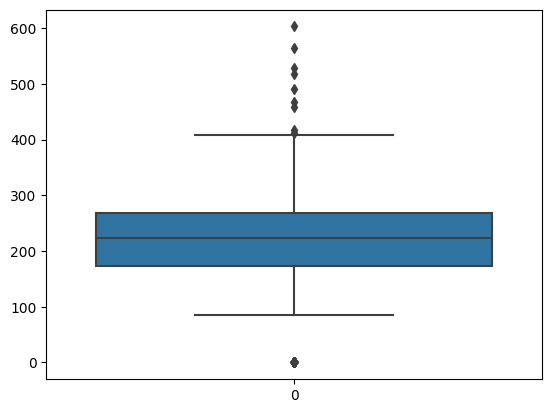

In [20]:
sns.boxplot(heart_copy["Cholesterol"])

In [21]:
#From the box plot we get that this variable contain outliers thus we can't fill null values with maen thus we can fill them by much better method called Imputation
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(heart_copy[["Cholesterol"]])
heart_copy["Cholesterol"]=imputer.transform(heart_copy[["Cholesterol"]])

**E) Max HR**

<Axes: >

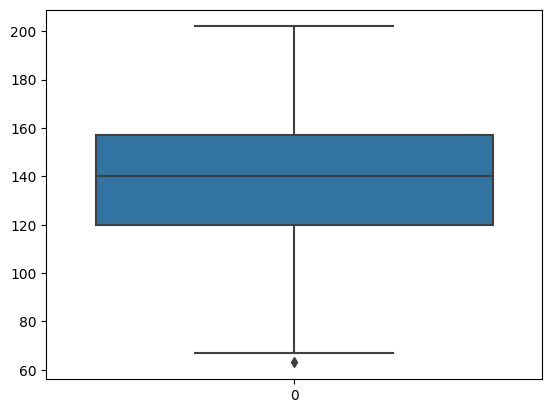

In [22]:
sns.boxplot(heart_copy["MaxHR"])

In [23]:
#Filling missing values of MaxHR by median
heart_copy["MaxHR"].fillna(heart_copy["MaxHR"].median(),inplace=True)

 **F) Exercise Angina**

<Axes: xlabel='ExerciseAngina', ylabel='count'>

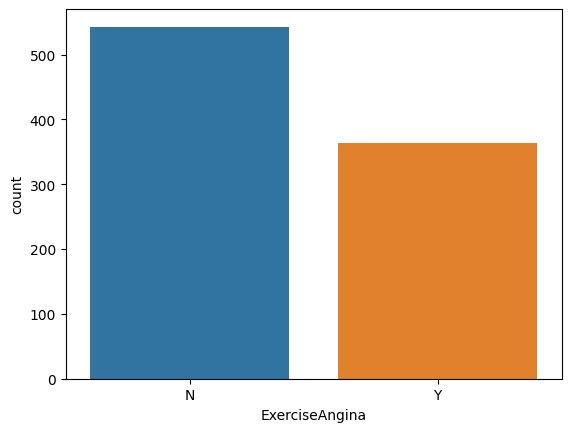

In [24]:
sns.countplot(x="ExerciseAngina",data=heart_copy)

In [25]:
#Since there is not much difference in the frequency on N and Y thus we can substitute the missing value by most frequent one
#Here we do Random sample imputation
heart_copy["ExerciseAngina"][heart_copy["ExerciseAngina"].isnull()]=heart_copy["ExerciseAngina"].dropna().sample(heart_copy["ExerciseAngina"].isnull().sum()).values

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1564\3340620311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_copy["ExerciseAngina"][heart_copy["ExerciseAngina"].isnull()]=heart_copy["ExerciseAngina"].dropna().sample(heart_copy["ExerciseAngina"].isnull().sum()).values


**G) Old Peak**

<Axes: >

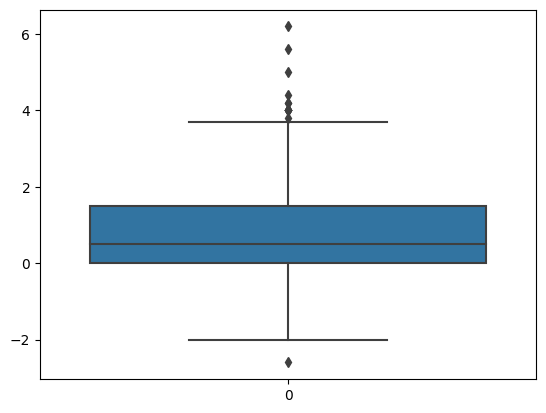

In [26]:
sns.boxplot(heart_copy["Oldpeak"])

In [27]:
#From the box plot we get that this variable contain outliers thus we can't fill null values with maen thus we can fill them by much better method called Imputation
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(heart_copy[["Oldpeak"]])
heart_copy["Oldpeak"]=imputer.transform(heart_copy[["Oldpeak"]])

In [28]:
heart_copy.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Changing Datatype of some variables

In [29]:
list=["RestingBP","Cholesterol","MaxHR"]
for i in list:
   heart_copy[i]=heart_copy[i].apply(lambda x:int(x))

In [30]:
heart_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Removing Outliers from variables

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1564\2893447546.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_copy["RestingBP"],hist=False)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='RestingBP', ylabel='Density'>

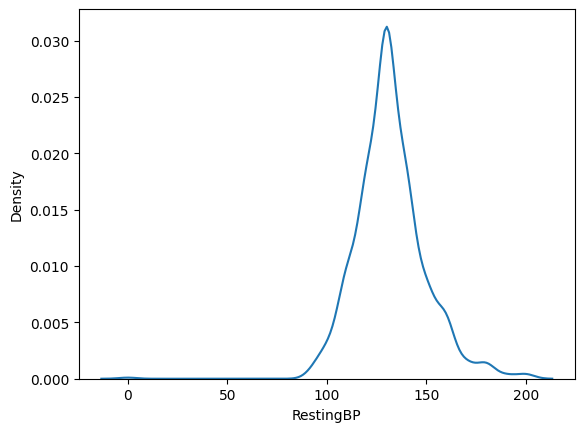

In [31]:
sns.distplot(heart_copy["RestingBP"],hist=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1564\1887152266.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_copy["Cholesterol"],hist=False)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Cholesterol', ylabel='Density'>

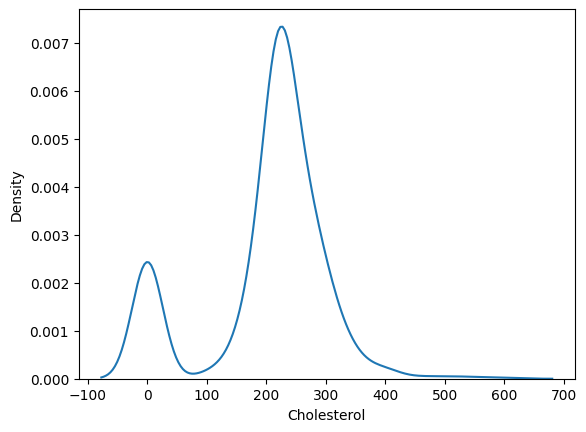

In [32]:
sns.distplot(heart_copy["Cholesterol"],hist=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1564\1376932403.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_copy["Oldpeak"],hist=False)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Oldpeak', ylabel='Density'>

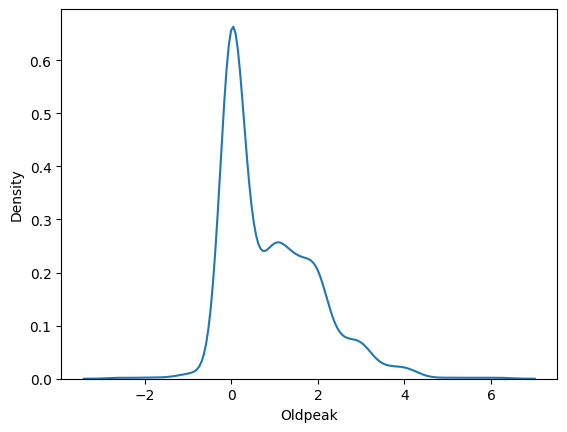

In [33]:
sns.distplot(heart_copy["Oldpeak"],hist=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1564\243561531.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_copy["MaxHR"],hist=False)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MaxHR', ylabel='Density'>

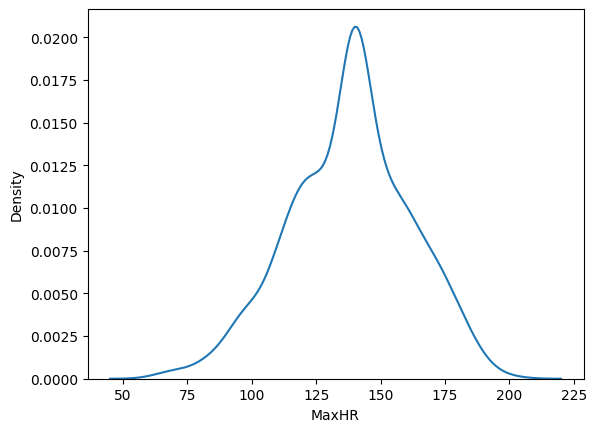

In [34]:
sns.distplot(heart_copy["MaxHR"],hist=False)

From pdf of targeted variable we get that none of them have normal distribution thus we remove the outliers through IQR method

In [35]:
list=["RestingBP","Cholesterol","Oldpeak","MaxHR"]
for i in list:
    q1=np.percentile(heart_copy[i],25)
    q3=np.percentile(heart_copy[i],75)
    min=q1-(1.5*(q3-q1))
    max=q3+(1.5*(q3-q1))
    heart_copy[i]=np.where(heart_copy[i]>max,max,np.where(heart_copy[i]<min,min,heart_copy[i]))

<Axes: >

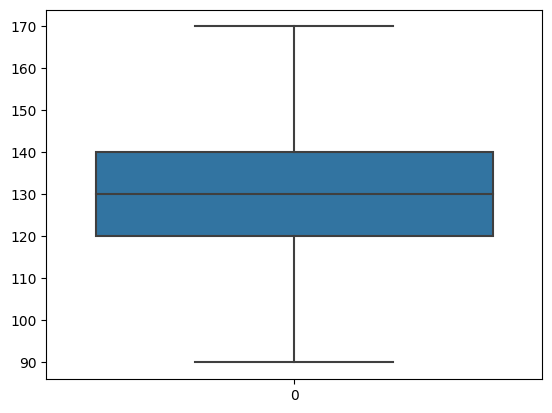

In [36]:
sns.boxplot(heart_copy["RestingBP"])

<Axes: >

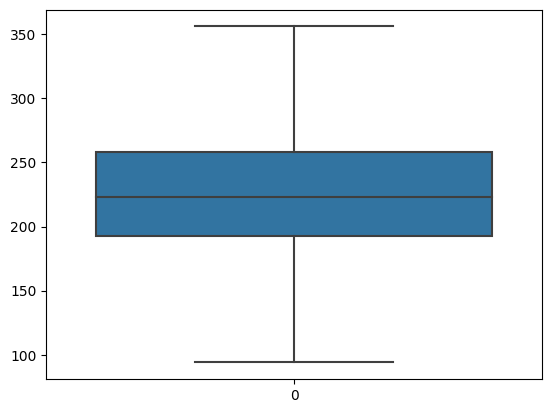

In [37]:
sns.boxplot(heart_copy["Cholesterol"])

<Axes: >

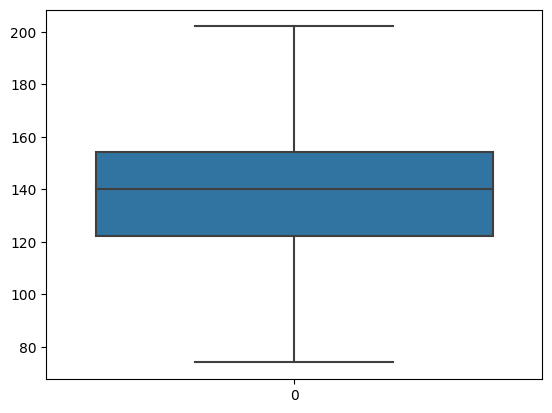

In [38]:
sns.boxplot(heart_copy["MaxHR"])

<Axes: >

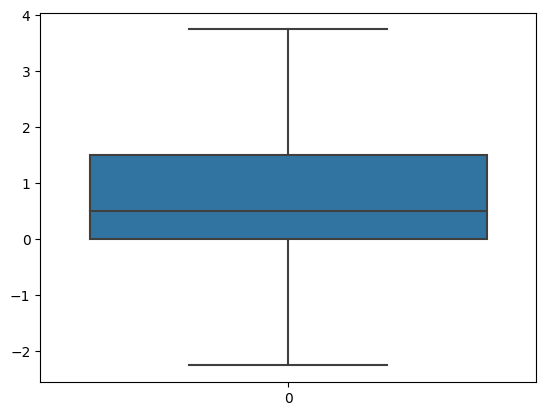

In [39]:
sns.boxplot(heart_copy["Oldpeak"])

# Data Analysis

In [40]:
heart_copy

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,135.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115.0,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174.0,N,0.0,Flat,1


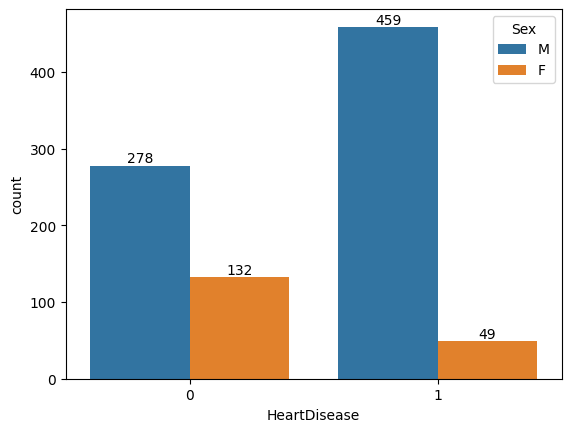

In [41]:
ax=sns.countplot(x="HeartDisease",data=heart_copy,hue="Sex")
for container in ax.containers:
    ax.bar_label(container)

*From the above graph it can be conclude that Males have more heart diseases than Females*

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

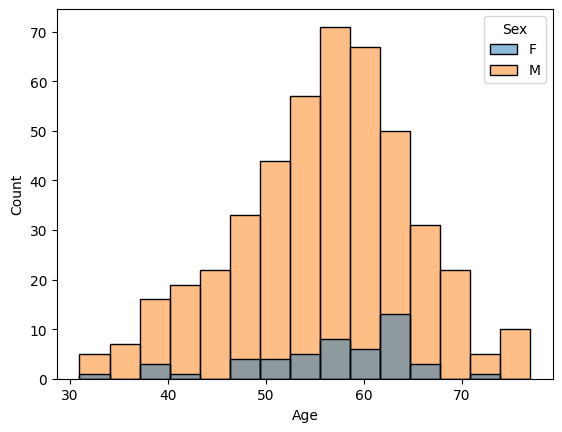

In [42]:
sns.histplot(data=heart_copy[heart_copy["HeartDisease"]==1],x="Age",hue="Sex",bins=15)

*From the above graph it can be conclude that persons between the age 50-65 have more chances to have a Heart Disease*

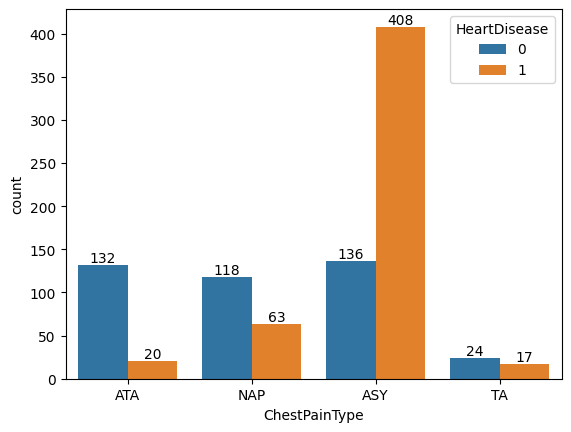

In [43]:
ax=sns.countplot(x="ChestPainType",data=heart_copy,hue="HeartDisease")
for container in ax.containers:
    ax.bar_label(container)

*From the graph it can be concluded that most of the persons who are suffering from Heart Diseases have ASY(Asymptotic) type chestpain.*

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1564\1399792224.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_copy[heart_copy["HeartDisease"]==1]["RestingBP"],bins=15,hist=False)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1564\1399792224.py:2: UserWarning: 

`distp

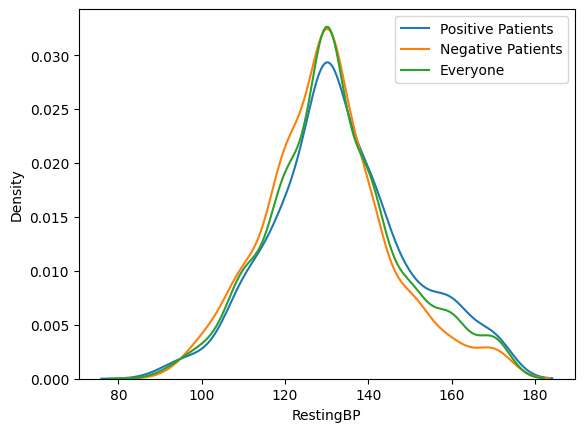

In [44]:
sns.distplot(heart_copy[heart_copy["HeartDisease"]==1]["RestingBP"],bins=15,hist=False)
sns.distplot(heart_copy[heart_copy["HeartDisease"]==0]["RestingBP"],bins=15,hist=False)
sns.distplot(heart_copy["RestingBP"],bins=15,hist=False)
plt.legend(loc="upper right",labels=["Positive Patients","Negative Patients","Everyone"])

*There is no appropriate relation between Positive reports and Resting BP* 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1564\359010778.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_copy[heart_copy["HeartDisease"]==1]["Cholesterol"],bins=15,hist=False)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1564\359010778.py:2: UserWarning: 

`distp

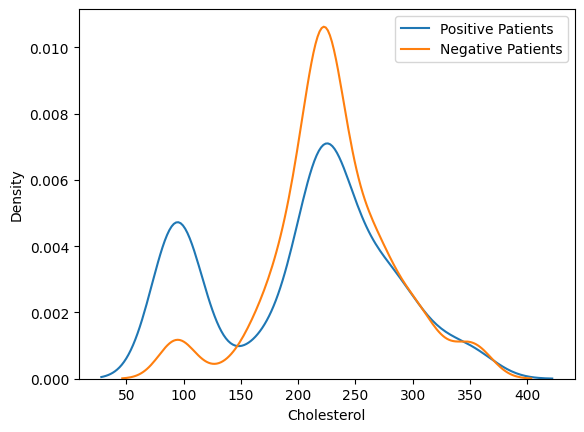

In [45]:
sns.distplot(heart_copy[heart_copy["HeartDisease"]==1]["Cholesterol"],bins=15,hist=False)
sns.distplot(heart_copy[heart_copy["HeartDisease"]==0]["Cholesterol"],bins=15,hist=False)
plt.legend(loc="upper right",labels=["Positive Patients","Negative Patients"])

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Cholesterol'>

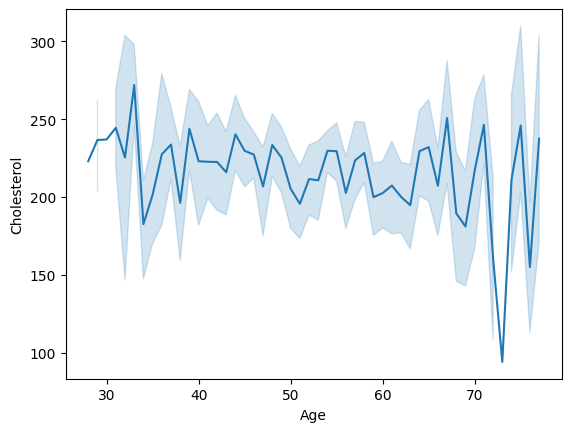

In [46]:
sns.lineplot(x="Age",y="Cholesterol",data=heart_copy)

*There is no appropriate relation between Positive reports and Cholesterol level. Also Cholesterol level is almost independent of Age according to data.* 


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1564\1416075843.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_copy[heart_copy["HeartDisease"]==1]["FastingBS"],bins=15,hist=False)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1564\1416075843.py:2: UserWarning: 

`distp

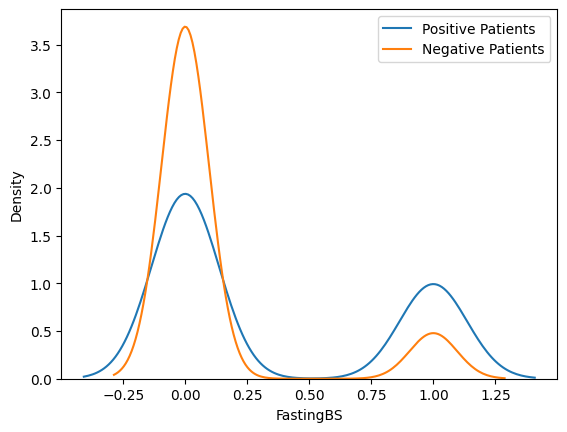

In [47]:
sns.distplot(heart_copy[heart_copy["HeartDisease"]==1]["FastingBS"],bins=15,hist=False)
sns.distplot(heart_copy[heart_copy["HeartDisease"]==0]["FastingBS"],bins=15,hist=False)
plt.legend(loc="upper right",labels=["Positive Patients","Negative Patients"])

*There is no appropriate relation between Positive reports and Fasting BS. But still if people ahve high cholesterol even then there is more probability that he/she suffer from heart disease.* 

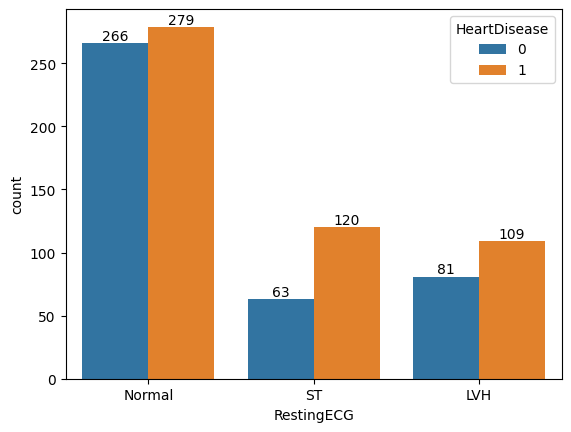

In [48]:
ax=sns.countplot(x="RestingECG",data=heart_copy,hue="HeartDisease")
for container in ax.containers:
    ax.bar_label(container)

*No conclusion can be drawn*

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1564\1057572408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_copy[heart_copy["HeartDisease"]==1]["MaxHR"],kde=False)


<Axes: xlabel='MaxHR'>

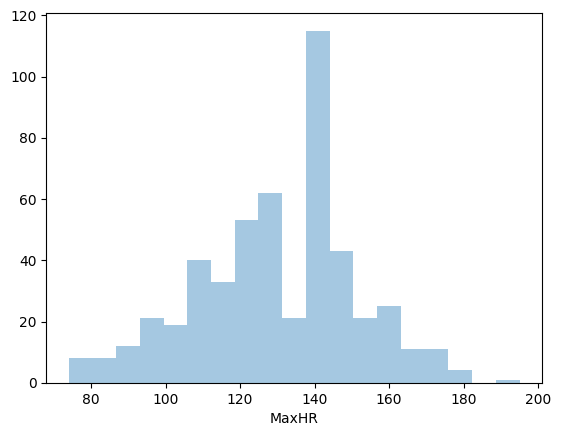

In [49]:
sns.distplot(heart_copy[heart_copy["HeartDisease"]==1]["MaxHR"],kde=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1564\2697896230.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_copy[heart_copy["HeartDisease"]==0]["MaxHR"],kde=False)


<Axes: xlabel='MaxHR'>

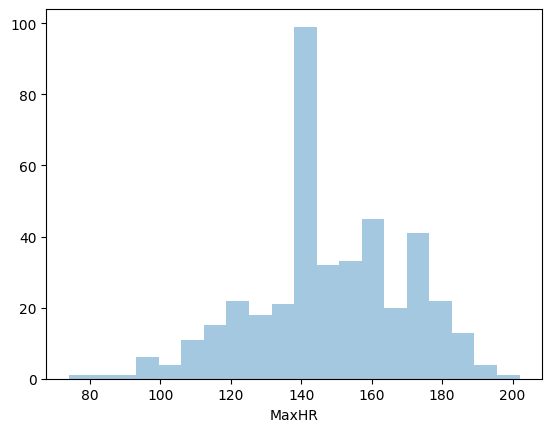

In [50]:
sns.distplot(heart_copy[heart_copy["HeartDisease"]==0]["MaxHR"],kde=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1564\69159862.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_copy[heart_copy["HeartDisease"]==1]["MaxHR"],hist=False)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1564\69159862.py:2: UserWarning: 

`distplot` is a deprec

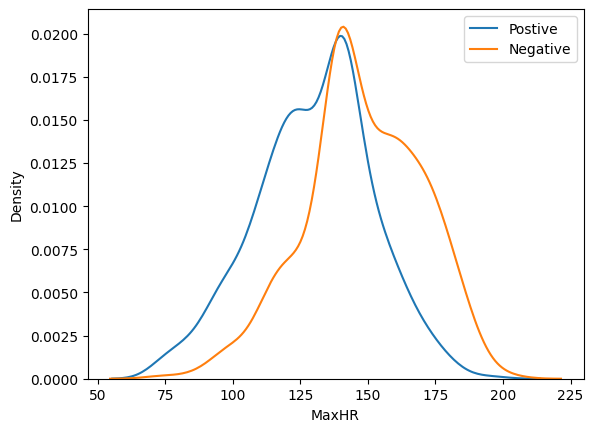

In [51]:
sns.distplot(heart_copy[heart_copy["HeartDisease"]==1]["MaxHR"],hist=False)
sns.distplot(heart_copy[heart_copy["HeartDisease"]==0]["MaxHR"],hist=False)
plt.legend(labels=["Postive","Negative"])

In [52]:
heart_copy[heart_copy["HeartDisease"]==1]["MaxHR"].median()

131.0

In [53]:
heart_copy[heart_copy["HeartDisease"]==0]["MaxHR"].median()

146.5

*From the graph it can be concluded that the persons who have heart diseases they have low Maximum Heart Rate than normal persons.*

In [54]:
pd.crosstab(heart_copy["ExerciseAngina"],heart_copy["HeartDisease"])

HeartDisease,0,1
ExerciseAngina,,
N,354,195
Y,56,313


<Axes: xlabel='HeartDisease', ylabel='ExerciseAngina'>

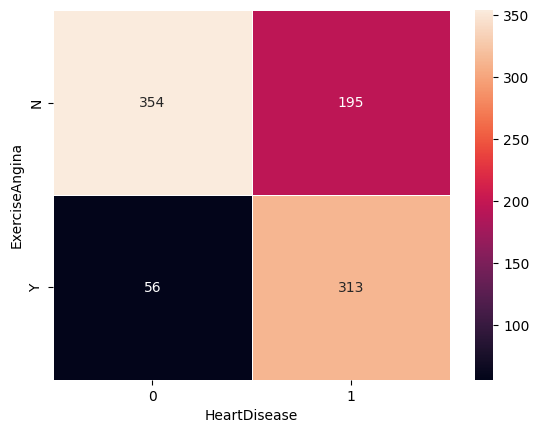

In [55]:
sns.heatmap(pd.crosstab(heart_copy["ExerciseAngina"],heart_copy["HeartDisease"]),linewidths=0.5,annot=True,fmt="d")

*From heat map it can be concluded that the persons who suffer from heart diseases they face chest pain during exercise engage angina like running,climbing,etc.*

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Oldpeak', ylabel='Count'>

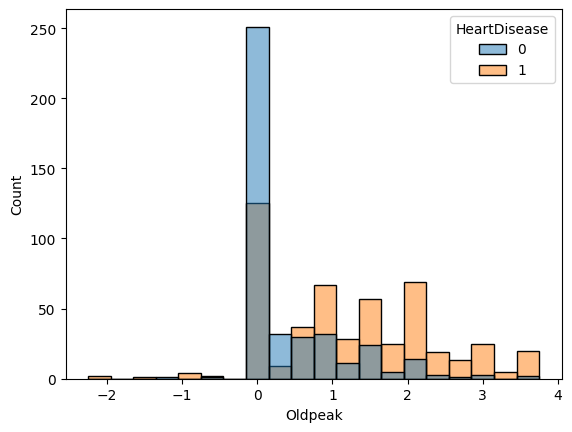

In [56]:
sns.histplot(x="Oldpeak",data=heart_copy,hue="HeartDisease")

*From the graph it can be concluded that the more positive value of Old Peak reflects high chances of Heart Disease.*

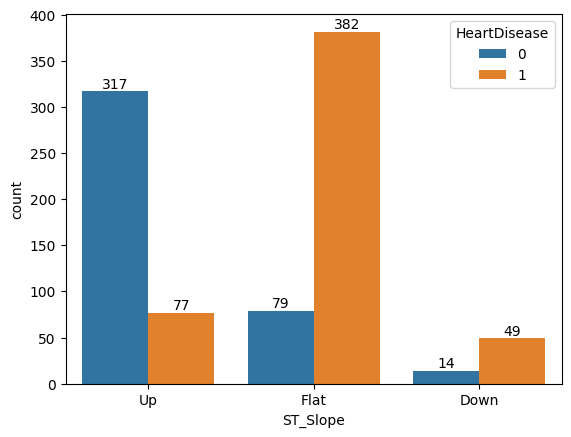

In [57]:
ax=sns.countplot(x="ST_Slope",data=heart_copy,hue="HeartDisease")
for container in ax.containers:
    ax.bar_label(container)

*The conclusion drawn from the graph is that individuals without heart disease are more likely to exhibit an "up" ST slope, whereas those with heart disease are more likely to show a "flat" ST slope compared to normal individuals.*

# **Analysis Report**

*Based on the analysis of the provided data, the following conclusions can be drawn regarding the factors influencing heart disease:*

**Gender and Age**:

-*Males are more susceptible to heart diseases than females.*

-*Individuals between the ages of 50-65 years are at a higher risk of developing heart disease.*

**Chest Pain Type**:

-*ASY (Asymptotic) type chest pain is commonly associated with individuals suffering from heart diseases.*

**Resting Blood Pressure and Cholesterol**:


-*No significant correlation exists between positive reports and resting blood pressure.*

-*Cholesterol levels show independence from age and have no clear relationship with positive report.*

**Fasting Blood Sugar**:

-*There is no distinct connection between positive reports and fasting blood sugar. However, high cholesterol levels increase the probability of heart disease.*

**Maximum Heart Rate**:

-*Heart disease patients tend to have a lower maximum heart rate compared to those without heart issues.*

**Exercise-Induced Angina**:

-*Individuals with heart diseases commonly experience chest pain during exercise activities like running and climbing.*

**ST Slope Patterns**:

-*Individuals without heart disease are more likely to exhibit an "up" ST slope, while those with heart disease are more likely to display a "flat" ST    slope compared to normal individuals.*

*In conclusion, gender, age, chest pain type, maximum heart rate, exercise-induced angina, and ST slope patterns in electrocardiograms appear to be relevant factors in understanding the likelihood of heart disease. However, these are observational trends, and individual cases may vary. Professional medical consultation is essential for accurate diagnosis and personalized healthcare.*